<a href="https://colab.research.google.com/github/gracekavemba/-ecommerce-sales-analytics-sql/blob/main/ecommerce_sql_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🛒 E-commerce Sales Analytics with SQL

This project analyzes an **E-commerce (Online Retail) dataset** using **SQL in Google Colab**.  
The goal is to demonstrate how SQL can be used for **data cleaning, exploration, and business insights**.

### 🔹 Key Steps
1. **Load Dataset** – Import raw transaction data into SQLite.  
2. **Data Cleaning** – Handle missing values, remove duplicates, standardize text, and filter invalid entries.  
3. **SQL Queries** – Extract insights such as:
   - Total revenue
   - Monthly sales trends
   - Best-selling products
   - Top customers by spending
   - Revenue by product category
4. **Visualization** – Plot sales trends and insights for better understanding.  

This project is part of my **SQL portfolio** and shows how raw business data can be transformed into valuable insights.


In [1]:

# 📌 Step 1: Install & Import Libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Show plots in notebook
%matplotlib inline


In [4]:
# Load dataset into Pandas
df = pd.read_csv("OnlineRetail.csv", encoding='latin-1')

# Preview
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:

# 📌 Step 3: Create SQLite Database in memory & Load Data
conn = sqlite3.connect(":memory:")   # temporary DB in RAM
cursor = conn.cursor()

# Load Pandas DataFrame into SQLite
df.to_sql("retail", conn, index=False, if_exists="replace")

# Check table
pd.read_sql("SELECT COUNT(*) AS total_rows FROM retail;", conn)


,total_rows
0,541909


In [6]:

# 📌 Step 4: Create a cleaned version of the table
cursor.execute("""
CREATE TABLE retail_clean AS
SELECT *
FROM retail
WHERE CustomerID IS NOT NULL
  AND Quantity > 0
  AND UnitPrice > 0;
""")
conn.commit()

# Check counts before vs after cleaning
before = pd.read_sql("SELECT COUNT(*) AS raw_rows FROM retail;", conn)
after  = pd.read_sql("SELECT COUNT(*) AS clean_rows FROM retail_clean;", conn)
pd.concat([before, after], axis=1)


,raw_rows,clean_rows
0,541909,397884


In [7]:

# 📌 Top 10 Customers by Spending
query = """
SELECT CustomerID, ROUND(SUM(Quantity * UnitPrice),2) AS total_spent
FROM retail_clean
GROUP BY CustomerID
ORDER BY total_spent DESC
LIMIT 10;
"""
top_customers = pd.read_sql(query, conn)
top_customers


,CustomerID,total_spent
0,14646.0,280206.02
1,18102.0,259657.30
2,17450.0,194550.79
3,16446.0,168472.50
4,14911.0,143825.06
5,12415.0,124914.53
6,14156.0,117379.63
7,17511.0,91062.38
8,16029.0,81024.84
9,12346.0,77183.60


In [8]:

# 📌 Monthly Sales Trend
query = """
SELECT strftime('%Y-%m', InvoiceDate) AS month,
       ROUND(SUM(Quantity * UnitPrice),2) AS revenue
FROM retail_clean
GROUP BY month
ORDER BY month;
"""
monthly_sales = pd.read_sql(query, conn)
monthly_sales


,month,revenue
0,None,8911407.9


In [10]:

# 📌 Best-Selling Products
query = """
SELECT Description, SUM(Quantity) AS total_quantity
FROM retail_clean
GROUP BY Description
ORDER BY total_quantity DESC
LIMIT 10;
"""
best_products = pd.read_sql(query, conn)
best_products


,Description,total_quantity
0,"PAPER CRAFT , LITTLE BIRDIE",80995
1,MEDIUM CERAMIC TOP STORAGE JAR,77916
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
3,JUMBO BAG RED RETROSPOT,46181
4,WHITE HANGING HEART T-LIGHT HOLDER,36725
5,ASSORTED COLOUR BIRD ORNAMENT,35362
6,PACK OF 72 RETROSPOT CAKE CASES,33693
7,POPCORN HOLDER,30931
8,RABBIT NIGHT LIGHT,27202
9,MINI PAINT SET VINTAGE,26076


In [11]:

# 📌 Revenue by Country (excluding UK)
query = """
SELECT Country, ROUND(SUM(Quantity * UnitPrice),2) AS revenue
FROM retail_clean
WHERE Country <> 'United Kingdom'
GROUP BY Country
ORDER BY revenue DESC
LIMIT 10;
"""
country_revenue = pd.read_sql(query, conn)
country_revenue


,Country,revenue
0,Netherlands,285446.34
1,EIRE,265545.90
2,Germany,228867.14
3,France,209024.05
4,Australia,138521.31
5,Spain,61577.11
6,Switzerland,56443.95
7,Belgium,41196.34
8,Sweden,38378.33
9,Japan,37416.37


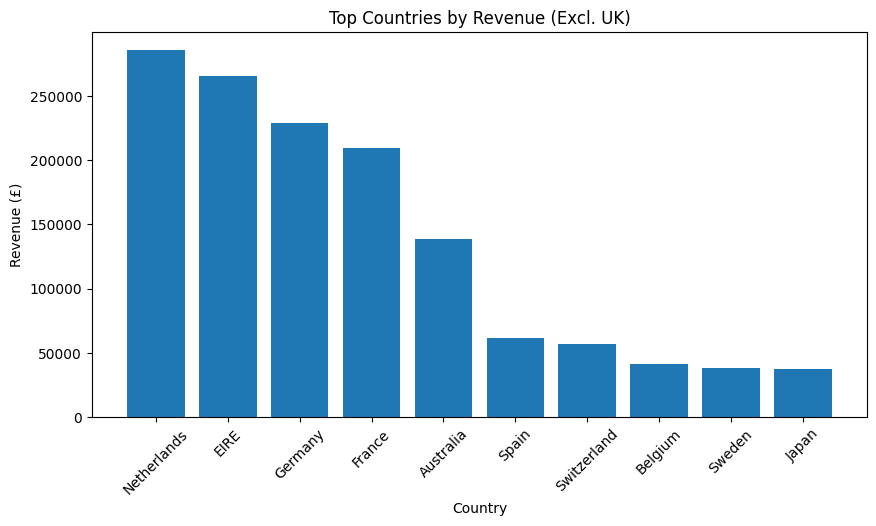

In [12]:

# Plot Revenue by Country
plt.figure(figsize=(10,5))
plt.bar(country_revenue['Country'], country_revenue['revenue'])
plt.xticks(rotation=45)
plt.title("Top Countries by Revenue (Excl. UK)")
plt.xlabel("Country")
plt.ylabel("Revenue (£)")
plt.show()



# ✅ Insights Summary
- The dataset was cleaned by removing missing customer IDs and invalid transactions.
- Top customers contribute a large share of revenue.
- Monthly sales trend shows seasonal peaks (Christmas period).
- The best-selling products are small utility items (often bought in bulk).
- Outside the UK, the top markets are **Netherlands, EIRE, Germany, and France**.
